## Sentiment Analysis

#### import data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#df = pd.read_csv('../merged_df/merged_df.csv', sep=",", index_col=0)

In [64]:
df_text=pd.read_csv('data/textual/df_text_eda.csv', sep=",", index_col=0 )

In [65]:
df_text.head(2)

,url,title,date,author,description,text,Article Length
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,Who's this for: The Citi Simplicity® Card has ...,1133
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,If you lack a credit history or have poor cred...,1468


In [66]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9770 entries, 0 to 10002
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             9770 non-null   object
 1   title           9770 non-null   object
 2   date            9770 non-null   object
 3   author          9565 non-null   object
 4   description     9746 non-null   object
 5   text            9770 non-null   object
 6   Article Length  9770 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 610.6+ KB


#### Only use articles that mention the given ticker and stock market 

GOOG|Google|Sundar Pichai|Android|AdSense|
AMZN|Amazon|Andy Jassy|Prime|AWS|
Shares|Dividend|Earnings|IPO|Buyback|Financial Results|Quarterly Report|SEC Filings|Stock Split|Market Cap|Trading Volume|



TSLA|Tesla|Elon Musk|Model S|Cybertruck|
AAPL|Apple|Tim Cook|iPhone|Mac|
Merger|Acquisition|Partnership|Innovation|Patent|Lawsuit|Regulation|Stock|Option

"Satya Nadella|Nadella|Azure|Windows|Microsoft|MSFT|Xbox|Office|Surface|Microsoft Teams|Microsoft Edge|OneDrive|Skype|LinkedIn|Outlook|Bill Gates|Steve Ballmer"

In [67]:
import pandas as pd
 
keywords = '''
Microsoft|MSFT|Satya Nadella|Bill Gates|Steve Ballmer|
Windows|Azure|Office|Xbox|Surface|Teams|OneDrive|Skype|LinkedIn|Outlook|Edge|
SQL Server|Power BI|Microsoft Dynamics|SharePoint|Microsoft 365|Visual Studio|GitHub|
Hotmail|MS-DOS|Visual Basic|PowerPoint|Excel|Word|C#|Bing|
Apple|Google|Amazon|IBM|Oracle|Salesforce|SAP|Adobe|
AWS|Amazon Web Services|Google Cloud|IBM Cloud|Oracle Cloud|
Apple|iPhone|Mac|iPad|MacOS|Android|Samsung|Dell|HP|Lenovo|
Google Workspace|G Suite|Adobe Creative Cloud|Adobe Photoshop|Slack|Dropbox|
AAPL|Apple|Tim Cook|iPhone|Mac|GOOG|Google|Sundar Pichai|Android|AdSense|Stock|Steve Jobs
    
'''
# Filter articles based on keywords
df = df_text[df_text['text'].str.contains(keywords, case=False, na=False)]

df.head(), len(df)


(                                                 url  \
 0  https://www.cnbc.com/select/best-balance-trans...   
 2  https://www.cnbc.com/select/best-cash-back-cre...   
 3  https://www.cnbc.com/select/personal-loan-lend...   
 4  https://www.cnbc.com/select/best-credit-card-s...   
 5  https://www.cnbc.com/select/6-personal-loans-t...   
 
                                                title  \
 0  11 best balance transfer cards with 0% APR of ...   
 2    The best cash-back credit cards of January 2024   
 3  Do you need a large personal loan? These lende...   
 4  The best credit card sign-up bonuses of Januar...   
 5  6 personal loan lenders that’ll get you funded...   
 
                         date                              author  \
 0  2019-10-15 05:00:00+00:00      Jason Stauffer,Brett Holzhauer   
 2  2019-10-15 05:00:00+00:00     Alexandria White,Jason Stauffer   
 3  2022-05-06 19:12:25+00:00                     Jasmin Suknanan   
 4  2019-11-12 19:30:46+00:00  Eliza

## bert-base-multilingual-uncased-sentiment

In [68]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [69]:
import torch

def analyze_sentiment(text):
    # Tokenize and prepare the input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted sentiment
    sentiment_scores = outputs.logits
    predicted_class = torch.argmax(sentiment_scores, dim=1).item()

    # Return the sentiment as a numeric value from 1 to 5
    sentiment_value = predicted_class + 1  # To convert zero-indexed to 1-indexed

    return sentiment_value


In [70]:
# Add a new column for sentiment analysis results
df["sentiment"] = df["text"].apply(analyze_sentiment)

C:\Users\ethan\AppData\Local\Temp\ipykernel_20476\1673758664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["text"].apply(analyze_sentiment)


In [76]:
df.head()

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,Who's this for: The Citi Simplicity® Card has ...,1133,4,positive
2,https://www.cnbc.com/select/best-cash-back-cre...,The best cash-back credit cards of January 2024,2019-10-15 05:00:00+00:00,"Alexandria White,Jason Stauffer",We analyzed 50 of the most popular cash-back c...,Who's this for? The Citi Double Cash® Card is ...,1598,4,positive
3,https://www.cnbc.com/select/personal-loan-lend...,Do you need a large personal loan? These lende...,2022-05-06 19:12:25+00:00,Jasmin Suknanan,Select analyzed key factors like interest rate...,Personal loans are a common way to pay for lar...,1035,4,positive
4,https://www.cnbc.com/select/best-credit-card-s...,The best credit card sign-up bonuses of Januar...,2019-11-12 19:30:46+00:00,"Elizabeth Gravier,Alexandria White",We analyzed the most popular credit cards avai...,Terms apply to American Express benefits and o...,1848,4,positive
5,https://www.cnbc.com/select/6-personal-loans-t...,6 personal loan lenders that’ll get you funded...,2021-11-18 22:29:58+00:00,Jasmin Suknanan,Select rounded up some personal loan lenders t...,Personal loans have quickly become a convenien...,1848,4,positive


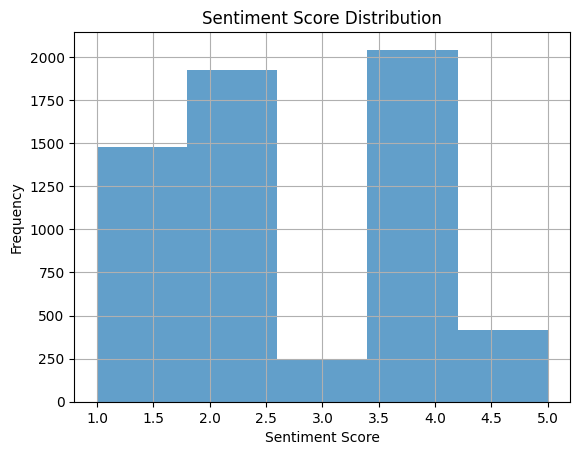

In [77]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of sentiment scores
df["sentiment"].hist(bins=5, alpha=0.7)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


#### Sentiment Labels

In [78]:
sentiment_labels = ["very negative", "negative", "neutral", "positive", "very positive"]

# Function to get the sentiment label based on the sentiment score
def get_sentiment_label(score):
    # Since the sentiment_scores are 1-based and sentiment_labels are zero-based
    return sentiment_labels[score - 1]

# Add a new column for the sentiment labels
df["sentiment_label"] = df["sentiment"].apply(get_sentiment_label)




C:\Users\ethan\AppData\Local\Temp\ipykernel_20476\1386082695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_label"] = df["sentiment"].apply(get_sentiment_label)


In [79]:
df.to_csv('data/textual/df_text_sentiment.csv')

### EDA

In [81]:
df.head(1)

,url,title,date,author,description,text,Article Length,sentiment,sentiment_label
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,Who's this for: The Citi Simplicity® Card has ...,1133,4,positive
